# Wind Stress

Mean zonal wind stress profile

In [1]:
%matplotlib inline

from cosima_cookbook import get_nc_variable, get_expt
from cosima_cookbook import memory
import matplotlib.pyplot as plt

/short/v45/jm0634/conda/envs/cosima/lib/python3.6/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


The following code block shows the zonal- and time-averaged wind stress forcing for each experiment.

In [2]:
@memory.cache
def calc_mean_tau_x(expt):
    
    tau_x = get_nc_variable(expt, 'ocean_month.nc', 'tau_x', n=25,
                           chunks={'xu_ocean':None})

    mean_tau_x = tau_x.mean('xu_ocean').mean('time')
    mean_tau_x = mean_tau_x.compute()
    
    return mean_tau_x

/short/v45/jm0634/conda/envs/cosima/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


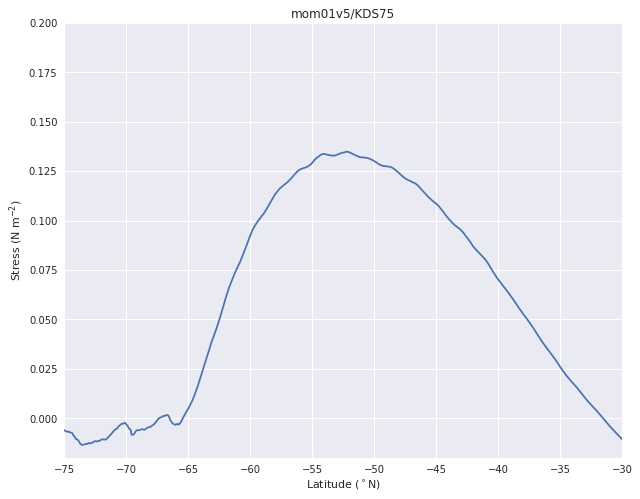

In [4]:
expt = get_expt()
mean_tau_x = calc_mean_tau_x(expt)

plt.figure(figsize=(10,8))
mean_tau_x.plot()
plt.xlim([-75,-30])
plt.ylim([-0.02,0.2])
plt.xlabel('Latitude ($^\circ$N)')
plt.ylabel('Stress (N m$^{-2}$)')
plt.title(expt)
plt.show()